In [169]:
install.packages("psych")

library(tidyverse)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [112]:
ecommerce_customers = read_csv("https://raw.githubusercontent.com/karthickai/Linear-Regression/master/Ecommerce%20Customers", show_col_types = FALSE)
head(ecommerce_customers)

Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mstephenson@fernandez.com,"835 Frank Tunnel Wrightmouth, MI 82180-9605",Violet,34.49727,12.65565,39.57767,4.082621,587.9511
hduke@hotmail.com,"4547 Archer Common Diazchester, CA 06566-8576",DarkGreen,31.92627,11.10946,37.26896,2.664034,392.2049
pallen@yahoo.com,"24645 Valerie Unions Suite 582 Cobbborough, DC 99414-7564",Bisque,33.00091,11.33028,37.11060,4.104543,487.5475
riverarebecca@gmail.com,"1414 David Throughway Port Jason, OH 22070-1220",SaddleBrown,34.30556,13.71751,36.72128,3.120179,581.8523
mstephens@davidson-herman.com,"14023 Rodriguez Passage Port Jacobville, PR 37242-1057",MediumAquaMarine,33.33067,12.79519,37.53665,4.446308,599.4061
alvareznancy@lucas.biz,"645 Martha Park Apt. 611 Jeffreychester, MN 67218-7250",FloralWhite,33.87104,12.02693,34.47688,5.493507,637.1024


In [120]:
sort(table(ecommerce_customers$Avatar))


               Azure 
                   1 
               Coral 
                   1 
      CornflowerBlue 
                   1 
         DeepSkyBlue 
                   1 
           LawnGreen 
                   1 
LightGoldenRodYellow 
                   1 
      LightSlateGray 
                   1 
        MediumPurple 
                   1 
         NavajoWhite 
                   1 
       PaleGoldenRod 
                   1 
           PaleGreen 
                   1 
       PaleTurquoise 
                   1 
          PapayaWhip 
                   1 
          PowderBlue 
                   1 
                 Red 
                   1 
              Yellow 
                   1 
           AliceBlue 
                   2 
               Black 
                   2 
          Chartreuse 
                   2 
            DarkGray 
                   2 
          DarkSalmon 
                   2 
       DarkSlateGray 
                   2 
           FireBrick 
         

- the data has 8 columns in which 3 are non-numeric
- Avatar column has 138 unique values
- there are no users from the same address

In [124]:
describe(ecommerce_customers, omit = TRUE)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Avg. Session Length,4,500,33.053194,0.9925631,33.082008,33.056582,1.0297181,29.5324290,36.139662,6.607234,-0.03198202,-0.01221977,0.04438877
Time on App,5,500,12.052488,0.9942156,11.983231,12.057463,1.0124208,8.5081522,15.126994,6.618842,-0.08858708,0.09942286,0.04446267
Time on Website,6,500,37.060445,1.0104889,37.069367,37.054034,1.0251831,33.9138472,40.005182,6.091334,0.01206913,-0.12083413,0.04519044
Length of Membership,7,500,3.533462,0.9992775,3.533975,3.549454,0.8850302,0.2699011,6.922689,6.652788,-0.10596926,0.32023252,0.04468905
Yearly Amount Spent,8,500,499.314038,79.3147815,498.887875,499.071946,76.8177488,256.6705823,765.518462,508.847880,0.03458172,0.43359700,3.54706486


- no missing values exist in data
- most of columns have mean and median are very close
- range of Yearly Amount Spent differ from other variables a lot

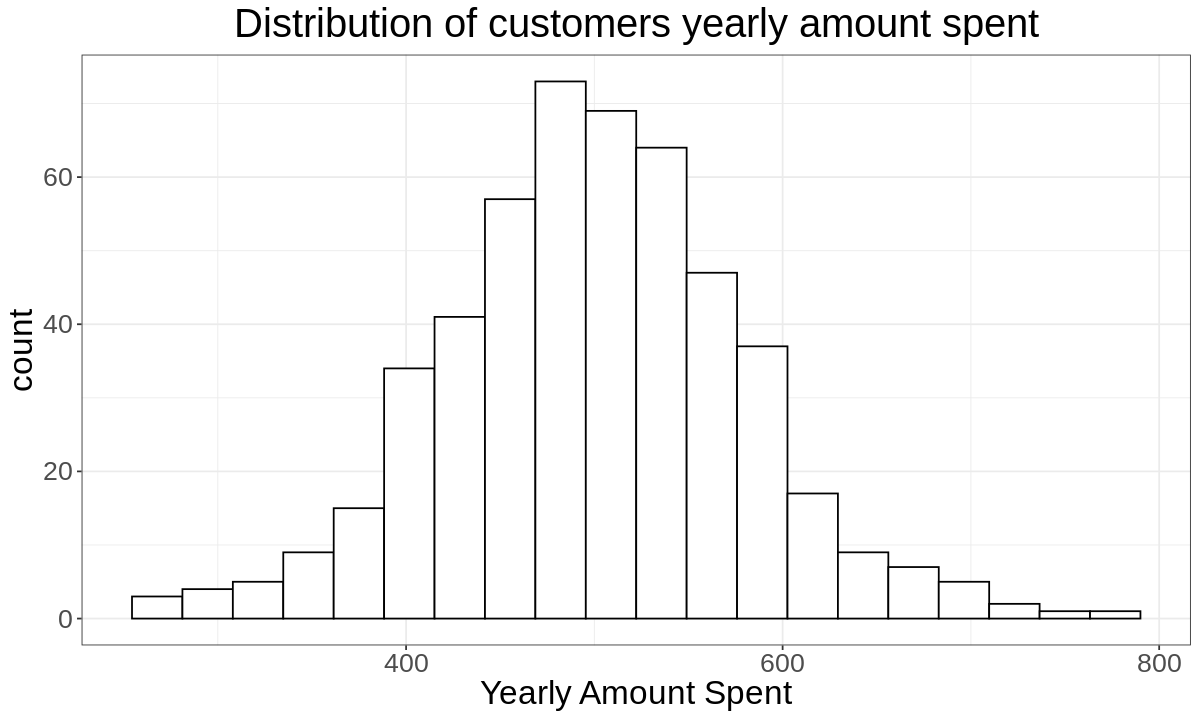

In [148]:
options(repr.plot.width = 10, repr.plot.height = 6)

conf <- theme_bw() +
theme(text = element_text(size=20), plot.title = element_text(hjust = 0.5))

ggplot(data = ecommerce_customers) + 
geom_histogram(mapping = aes(x = `Yearly Amount Spent`), bins = 20, color = "black", fill = "white") +
ggtitle("Distribution of customers yearly amount spent") + 
conf

- most of the customers spend around 400 - 600 per year
- there are more customers whose yearly spending is below mean spending

In [142]:
# sum(ecommerce_customers$`Yearly Amount Spent` < mean(ecommerce_customers$`Yearly Amount Spent`))

[1] 249

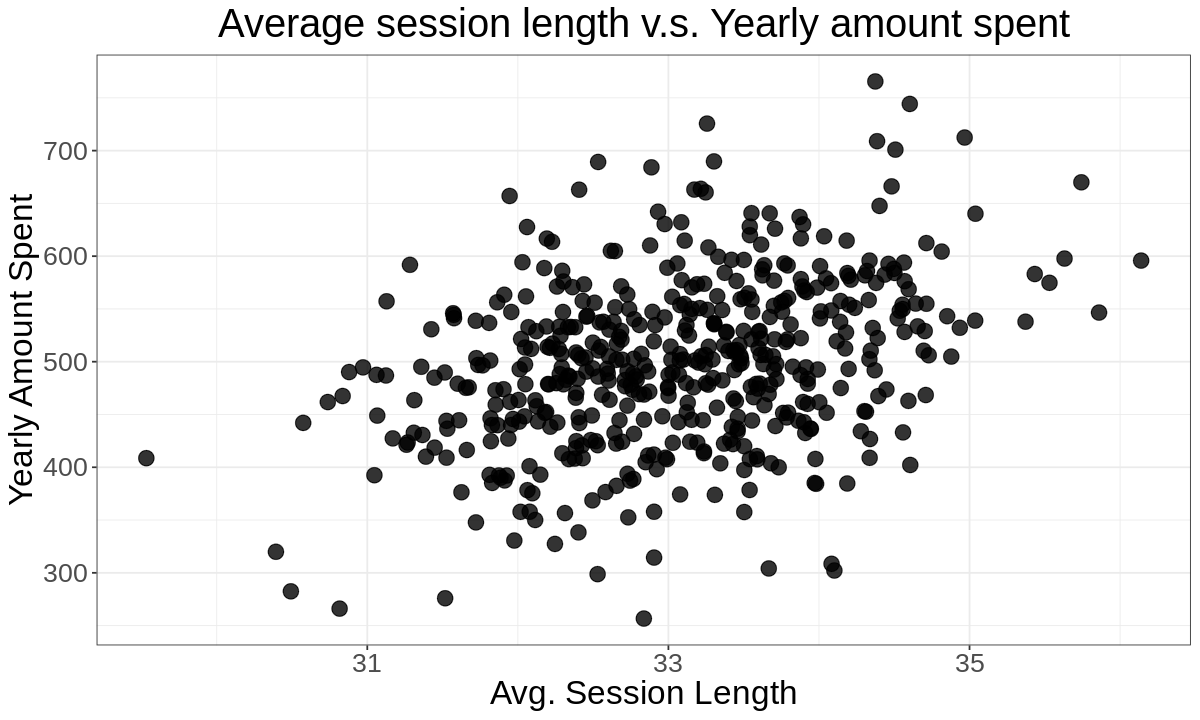

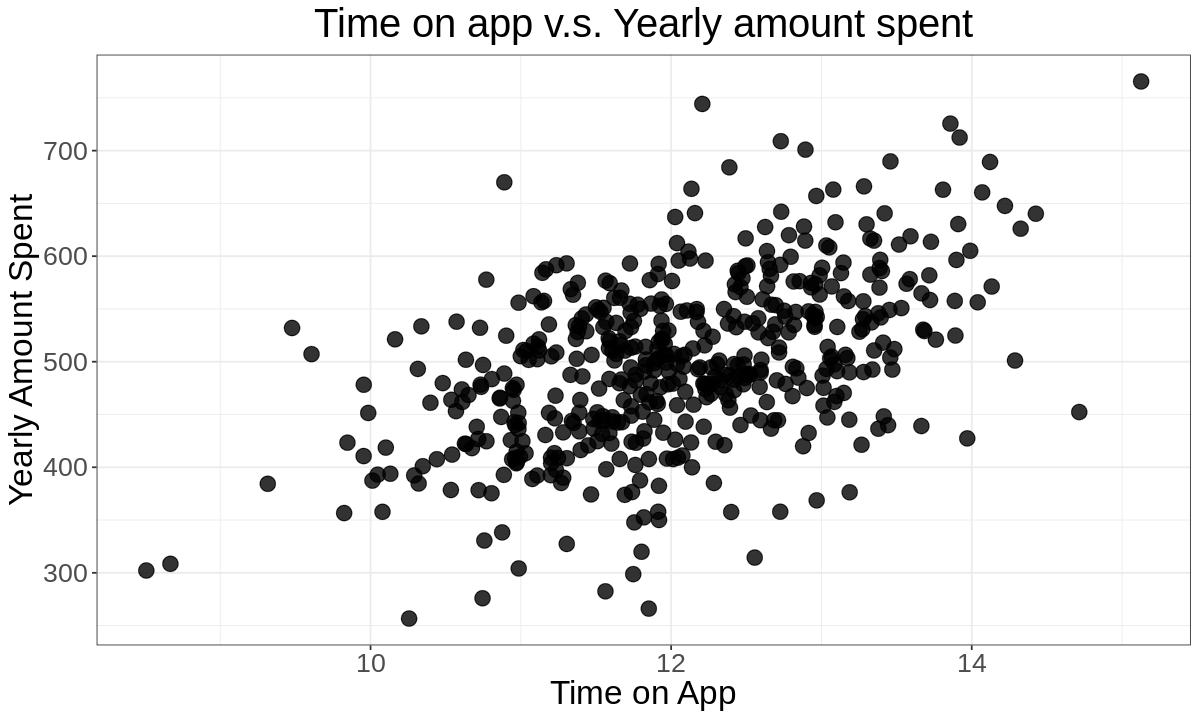

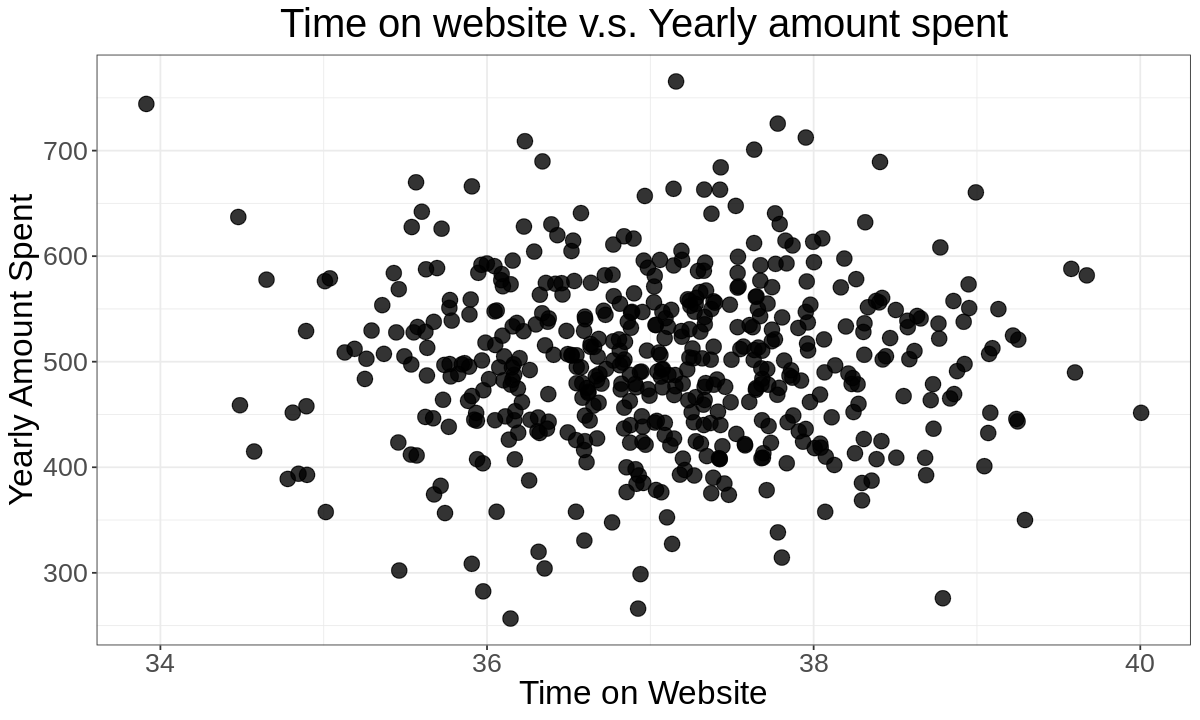

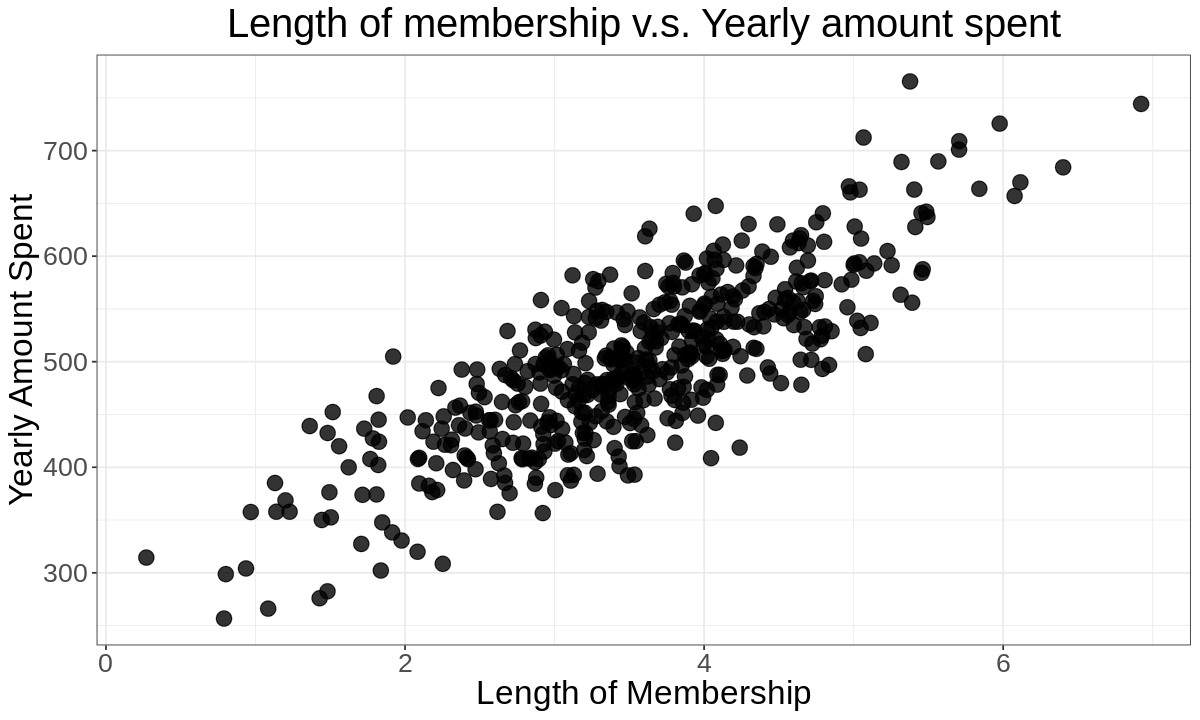

In [157]:
ggplot(data = ecommerce_customers) + 
geom_point(mapping = aes(x=`Avg. Session Length`, y = `Yearly Amount Spent`), size = 4, alpha = 0.8) +
ggtitle("Average session length v.s. Yearly amount spent") + 
conf

ggplot(data = ecommerce_customers) + 
geom_point(mapping = aes(x=`Time on App`, y = `Yearly Amount Spent`), size = 4, alpha = 0.8) +
ggtitle("Time on app v.s. Yearly amount spent") + 
conf

ggplot(data = ecommerce_customers) + 
geom_point(mapping = aes(x=`Time on Website`, y = `Yearly Amount Spent`), size = 4, alpha = 0.8) +
ggtitle("Time on website v.s. Yearly amount spent") + 
conf

ggplot(data = ecommerce_customers) + 
geom_point(mapping = aes(x=`Length of Membership`, y = `Yearly Amount Spent`), size = 4, alpha = 0.8) +
ggtitle("Length of membership v.s. Yearly amount spent") + 
conf

- most of the variables have positive correlation with the Yearly Amount Spent
- Length of Membership has the strongest correlation with Yearly Amount Spent
- Time on website has very little to no correlation with Yearly Amount Spent

In [184]:
mod <- lm(`Yearly Amount Spent` ~ `Length of Membership`, data = ecommerce_customers)

summary(mod)


Call:
lm(formula = `Yearly Amount Spent` ~ `Length of Membership`, 
    data = ecommerce_customers)

Residuals:
     Min 
-125.975 
      1Q 
 -29.032 
  Median 
  -0.494 
      3Q 
  33.033 
     Max 
 147.777 

Coefficients:
                       Estimate
(Intercept)             272.400
`Length of Membership`   64.219
                       Std. Error
(Intercept)                 7.675
`Length of Membership`      2.090
                       t value
(Intercept)              35.49
`Length of Membership`   30.72
                       Pr(>|t|)
(Intercept)              <2e-16
`Length of Membership`   <2e-16
                          
(Intercept)            ***
`Length of Membership` ***
---
Signif. codes:  
  0  ‘***’
  0.001  ‘**’
  0.01  ‘*’
  0.05  ‘.’
  0.1 ‘  ’ 1

Residual standard error: 46.66 on 498 degrees of freedom
Multiple R-squared:  0.6546,	Adjusted R-squared:  0.6539 
F-statistic: 943.9 on 1 and 498 DF,  p-value: < 2.2e-16


- model with Length of Membership as single independent variable is better than intercept only model
- for this data, per one unit increase in Length of Membership model give Yearly Amount Spent increased by 64.219
- model helped capture 65% of variance in target variable

In [193]:
mod2 <- lm(`Yearly Amount Spent` ~ `Length of Membership` + `Time on App`, data = ecommerce_customers)

summary(mod2)


Call:
lm(formula = `Yearly Amount Spent` ~ `Length of Membership` + 
    `Time on App`, data = ecommerce_customers)

Residuals:
    Min 
-81.601 
     1Q 
-19.447 
 Median 
  0.732 
     3Q 
 19.492 
    Max 
 75.657 

Coefficients:
                       Estimate
(Intercept)            -181.531
`Length of Membership`   63.117
`Time on App`            37.986
                       Std. Error
(Intercept)                15.422
`Length of Membership`      1.228
`Time on App`               1.234
                       t value
(Intercept)             -11.77
`Length of Membership`   51.40
`Time on App`            30.78
                       Pr(>|t|)
(Intercept)              <2e-16
`Length of Membership`   <2e-16
`Time on App`            <2e-16
                          
(Intercept)            ***
`Length of Membership` ***
`Time on App`          ***
---
Signif. codes:  
  0  ‘***’
  0.001  ‘**’
  0.01  ‘*’
  0.05  ‘.’
  0.1 ‘  ’ 1

Residual standard error: 27.4 on 497 degrees of freedom
Mu

- additional 23 % change in dependent variable can be captured after including Time on App as feature
- the greater Length of Membership and Time on App, the higher Yearly Amount Spent
- model cannot be used with new or no app interaction customers

In [191]:
mod3 <- lm(`Yearly Amount Spent` ~ `Length of Membership` + `Time on App` + `Avg. Session Length` + `Time on Website`, data = ecommerce_customers)

summary(mod3)


Call:
lm(formula = `Yearly Amount Spent` ~ `Length of Membership` + 
    `Time on App` + `Avg. Session Length` + `Time on Website`, 
    data = ecommerce_customers)

Residuals:
     Min 
-30.4059 
      1Q 
 -6.2191 
  Median 
 -0.1364 
      3Q 
  6.6048 
     Max 
 30.3085 

Coefficients:
                         Estimate
(Intercept)            -1051.5943
`Length of Membership`    61.5773
`Time on App`             38.7092
`Avg. Session Length`     25.7343
`Time on Website`          0.4367
                       Std. Error
(Intercept)               22.9925
`Length of Membership`     0.4483
`Time on App`              0.4510
`Avg. Session Length`      0.4510
`Time on Website`          0.4441
                       t value
(Intercept)            -45.736
`Length of Membership` 137.346
`Time on App`           85.828
`Avg. Session Length`   57.057
`Time on Website`        0.983
                       Pr(>|t|)
(Intercept)              <2e-16
`Length of Membership`   <2e-16
`Time on App`    

- it's unclear to conclude how Time on Website have effect on dependent variable in population level
- model suggest that the more lengthy customer's Sessions, the higher Yearly Amount Spent is
- model cannot be used with new or no interaction customers

In [186]:
# colnames(ecommerce_customers)

[1] "Email"               
[2] "Address"             
[3] "Avatar"              
[4] "Avg. Session Length" 
[5] "Time on App"         
[6] "Time on Website"     
[7] "Length of Membership"
[8] "Yearly Amount Spent"